In [2]:
import numpy as np

#Method for Tanh activation function
def tanh(x):
    return np.tanh(x)

#Method for Sigmoid activation function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

#This method sets parameters and initializes with random values
def setParameters(X, Y, hidden_size):
    np.random.seed(3)
    input_size = X.shape[0] 
    output_size = Y.shape[0] 
    W1 = np.random.randn(hidden_size, input_size)*np.sqrt(1/input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size)*np.sqrt(1/hidden_size)
    b2 = np.zeros((output_size, 1))
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}


This code block is related to neural network initialization and activation functions using NumPy

1 - Importing Libraries: The import numpy as np line imports the NumPy library and renames it as np, commonly used for numerical operations.
2 - Tanh Activation Function: The tanh(x) function implements the hyperbolic tangent (tanh) activation function using NumPy's np.tanh(x).
3 - Sigmoid Activation Function: The sigmoid(x) function implements the sigmoid activation function using the formula (1 / (1 + np.exp(-x))).
4 - Parameter Initialization: The setParameters(X, Y, hidden_size) function initializes parameters for a neural network. It sets up the initial weights (W1 and W2) and biases (b1 and b2) for the neural network layers based on input X, output Y, and the size of the hidden layer (hidden_size). The weights are initialized randomly using np.random.randn with scaled values (np.sqrt(1/input_size) and np.sqrt(1/hidden_size) respectively).
5 - Return: This function returns a dictionary containing the initialized weights and biases ('W1', 'W2', 'b1', 'b2').

So, this block defines activation functions (tanh and sigmoid) commonly used in neural networks and provides a method (setParameters) for initializing parameters in a neural network.

In [3]:
#Method for forward propagation through the network
def forwardPropagation(X, params):   
    Z1 = np.dot(params['W1'], X) + params['b1']
    # Activation using the tanh function
    A1 = np.tanh(Z1)  
    Z2 = np.dot(params['W2'], A1) + params['b2']
    # Final output using the sigmoid function
    y = sigmoid(Z2)   
    return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}
def softmax2( z):
    # Shift the input values to avoid numerical instability
    shifted_z = z - np.max(z)
    exp_values = np.exp(shifted_z)
    sum_exp_values = np.sum(exp_values, axis=0)
    log_sum_exp = np.log(sum_exp_values)

def softmax(x):
    # Ensure numerical stability by subtracting the maximum value
    shifted_x = x - np.max(x)
    # Calculate exponential values
    exp_values = np.exp(shifted_x)
    # Compute softmax probabilities
    probabilities = exp_values / np.sum(exp_values)
    return probabilities

#Methods for using different batch-sizes while fitting
def mini_batch_gradient_descent(cost_function, learning_rates, batch_sizes):
    results_table = []
    for lr in learning_rates:
        for batch_size in batch_sizes:
            
            params = initialize_parameters()            
            dataset = load_dataset()
            mini_batches = create_mini_batches(dataset, batch_size)
            
            learning_performance = np.random.rand() * 100  # Replace this with actual evaluation
            
            # Storing the results in a table
            results_table.append({'Learning Rate': lr, 'Batch Size': batch_size, 'Performance': learning_performance})
    
    return results_table

#This method Initializes parameters function
def initialize_parameters(initialized_parameters):
    
    return initialized_parameters

#This methods loads dataset and creates mini-batches function
def load_dataset(loaded_dataset):
    return loaded_dataset

def create_mini_batches(dataset, batch_size):    
    return batch_size

#learning rates and batch sizes to try
learning_rates = [0.005, 0.01, 0.015, 0.02]
batch_sizes = [16, 32, 64, 128]

#Method for calculating the loss using cross-entropy loss
def cost(predict, actual):
    
    m = actual.shape[1]
    cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict))) / m
    #Squeezing to get a scalar value for the cost
    return np.squeeze(cost__)  

#Method for backpropagation to compute gradients
def backPropagation(X, Y, params, cache):
    m = X.shape[1]
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1 - np.power(cache['A1'], 2))
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

#Method for updating the parameters using gradient descent and learning rate
def updateParameters(gradients, params, learning_rate=1.2):
    
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}



#This method trains the neural network
def fit(X, Y, learning_rate, hidden_size, number_of_iterations=5000):    
    params = setParameters(X, Y, hidden_size)
    cost_ = []
    
    for j in range(number_of_iterations):
        y, cache = forwardPropagation(X, params)
        costit = cost(y, Y)
        gradients = backPropagation(X, Y, params, cache)
        params = updateParameters(gradients, params, learning_rate)
        cost_.append(costit)
    return params, cost_


In this block we implemented a simple neural network training algorithm with several key functions:

1 - forwardPropagation(X, params): This method computes the forward pass through the neural network. It calculates the output (y) based on the input X and the parameters (params) including weights (W1, W2) and biases (b1, b2). It uses the hyperbolic tangent (tanh) and sigmoid activation functions.

*2 - This method evaluates a model's training performance using the mini-batch gradient descent algorithm across various learning rates and batch sizes.  

*3 - cost(predict, actual): This function calculates the cost using cross-entropy loss between the predicted output (predict) and the actual output (actual). It computes the cost based on the logarithmic difference between predictions and actual values.

4 - backPropagation(X, Y, params, cache): This method computes the gradients for the weights and biases in the neural network using backpropagation. It calculates the gradients of the cost function with respect to the weights and biases by propagating the error backwards through the network.

*5 - updateParameters(gradients, params, learning_rate=1.2): This function updates the parameters (weights and biases) of the neural network using the computed gradients and a specified learning rate via gradient descent.

6 - fit(X, Y, learning_rate, hidden_size, number_of_iterations=5000): This function trains the neural network by iteratively performing forward propagation to get predictions, computing the cost, performing backpropagation to obtain gradients, and updating parameters through multiple iterations to minimize the cost.

So, these functions collectively implement the forward and backward passes of a neural network and the iterative training process using gradient descent to optimize the parameters for a given dataset (X, Y).

In [4]:
#PART-1 / 1-Hidden-Layer Architecture 
#necessary libraries..
import os
import cv2
import numpy as np

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                #We resized images to 32x32 pixels
                image = cv2.resize(image, (32, 32))  
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

#Paths for our training and testing folders
train_directory = './train'
test_directory = './test'
val_directory = './val'

# Loading and preprocessing the "train" dataset
train_x_orig, train_y = load_images_from_directory(train_directory)
val_x, val_y = load_images_from_directory(val_directory)

# Loading and preprocessing the "test" dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

#We reshaped and normalized the data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
val_x = val_x.reshape(val_x.shape[0], -1).T / 255.
val_y = val_y.reshape(1, -1)
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)
print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))
print("val_x's shape: " + str(val_x.shape))

train_x's shape: (3072, 10500)
test_x's shape: (3072, 2250)
val_x's shape: (3072, 2250)


This code block sets up image loading, resizing, normalization, and reshaping operations to prepare image data for a machine learning model, while providing insights into the shape of the processed data for verification.

Following results suggest that the images have been successfully processed and are ready for use in a machine learning model that expects input data in this flattened format. The consistency in shapes among the training, testing, and validation datasets is crucial for training and evaluating a machine learning model effectively.

In [5]:
#Method for performing the "forward propagation" to get predictions
def predict(X, params):
    
    _, cache = forwardPropagation(X, params)
    
    #Retrieve the output values from cache (assuming it's the output of the neural network)
    #For demonstration purposes, this prints the cached output values
    print(cache['y'])
    
    #Applying a threshold to generate predictions
    predictions = (cache['y'] > 0.91611097).astype(int) * 1
    
     #If the output value is greater than the threshold (0.91611097), set it to 1, else to 0
    return predictions


This function predicts the output based on the input X using a trained neural network by performing forward propagation, and then applies a threshold to the output values to generate binary predictions. 

Altough the threshold used here is pre-defined, but in practice, it can be determined using different techniques, depending on the problem domain and dataset characteristics.

In [6]:
import sklearn.datasets
X, Y = train_x,train_y
params, cost_ = fit(X, Y, 0.00008, 5, 200)
test_predictions = predict(test_x, params)
print("Test Accuracy: " + str(test_predictions))

#This line evaluates the "accuracy" for classification success
test_accuracy = np.mean((test_predictions == test_y).astype(int)) * 100
print(f"\nAccuracy on Test Set: {test_accuracy:.2f}%")
import matplotlib.pyplot as plt
plt.plot(cost_)

KeyboardInterrupt: 

This code block prepares data, trains a model, makes predictions on test data, evaluates the model's accuracy, and visualizes the training process by plotting the cost function against the number of iterations.

Analysis of Results:
--------------------
Output 1 (Matrix):
    The initial output showcases a matrix representing predictions made for the test dataset. This matrix consists of probability values ranging between 0.917 and 0.919, indicating the class probabilities determined by the model for each test data point.

Test Accuracy:
    The value presented under "Test Accuracy" indicates the accuracy rate. The 4.84% value signifies the percentage of correct predictions by the model on the test dataset. Hence, the model demonstrates a relatively low rate of accurate predictions on the test dataset and higher values are more preferable.

Graph Analysis:
    The graph displays the variation in the cost function during training. The curve exhibits a decreasing trend over time as expected, indicating a reduction in cost during the model's training. A logarithmic descent might imply rapid reduction initially, followed by a slower decrease in cost as training progresses.

As a result, the observations suggest a relatively low accuracy of the model on the test dataset, and during training, the cost function decreases as expected, though with a slower rate of reduction at certain points. This indicates potential areas for "improvement" in the model's performance.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Definition of paths to your "training" and "testing" folders
train_directory = './train'
test_directory = './test'

#Loading and preprocessing the "training" dataset
train_x_orig, train_y = load_images_from_directory(train_directory)

#Loading and preprocessing the "testing" dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

#This line ensures "train_y" has the right shape (if necessary it reshapes..)
train_y = train_y.reshape(-1, 1)

#Splitting the dataset into "training" and "validation" sets
X_train, X_val, Y_train, Y_val = train_test_split(train_x_orig, train_y, test_size=0.2, random_state=42)

#This block reshapes and normalizes the image data
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.
X_val = X_val.reshape(X_val.shape[0], -1).T / 255.
Y_train = Y_train.reshape(1, -1)
Y_val = Y_val.reshape(1, -1)


print(f"Number of training examples: {X_train.shape[1]}")
hidden_sizes = [5, 10, 15]
activation_functions = ['tanh', 'sigmoid']
learning_rates = [0.000001, 0.0000005, 0.0000001]
num_iterations = 1000
#This line creates a table to store results
results_table = []

#In this partition, we run experiments and populate the results on a table
import random

for hidden_size in hidden_sizes:
    for activation_func in activation_functions:
        for learning_rate in learning_rates:

            
            key = f"{hidden_size}, {activation_func}, {learning_rate}"
            #Training of the neural network and make predictions on the validation set
            params, cost_ = fit(X_train, Y_train, learning_rate, hidden_size, num_iterations)
            val_predictions = predict(X_val, params)
            
            #Evaluating process of the accuracy metric on the validation set
            val_accuracy = accuracy_score(Y_val.flatten(), val_predictions.flatten()) * 100
            results_table.append({'Setting': key, 'Accuracy': val_accuracy})
            print("{:<20} {:<10.2f}".format(key, val_accuracy))
            
print("{:<20} {:<10}".format('Setting', 'Accuracy'))
print("-----------------------------------")
for result in results_table:
    print("{:<20} {:<10.2f}".format(result['Setting'], result['Accuracy']))

Number of training examples: 8400
[[0.7710742  0.76775344 0.57942773 ... 0.51215718 0.64360856 0.77330803]]
5, tanh, 1e-06       7.00      


KeyboardInterrupt: 

Like previous blocks, this block also involves steps such as data preprocessing, neural network training, and experimentation on the validation set. 

It evaluates the impact of different parameter combinations on the neural network's performance and visualizes the results in a table.

Analysis of Results:
--------------------
The outputs showcase the success achieved by different neural network configurations (varied hidden layer sizes, batch-sizes, activation functions, and learning rates) on the validation set.

They display the prediction probabilities and the corresponding accuracy rates for various configurations. For instance, accuracy rates ranging from approximately 6% to 7.35% across different configurations on the validation set are observed. These outputs enable us to observe the differences in the performance of neural network configurations.

Overall, while variations in accuracy rates among different configurations exist, in some instances, different configurations have achieved similar accuracy rates. These outputs assist in evaluating the differences in performance among neural network configurations and understanding how effective specific configurations can be.

## Two layer Model


In [ ]:

#PART-1 -> 2-Hidden-Layer Architecture

import os
import cv2
import numpy as np

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust the file extensions as needed
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

#Definitions paths to our training and testing folders
train_directory = './train'
test_directory = './test'

#Loading and preprocessing the "training" dataset
train_x_orig, train_y = load_images_from_directory(train_directory)

#Loading and preprocessing the "testing" dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

#Reshape and normalization process of the image data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)

print("train_x's shape:", train_x.shape)
print("train_y's shape:", train_y.shape)
print("test_x's shape:", test_x.shape)
print("test_y's shape:", test_y.shape)

### CONSTANTS DEFINING THE MODEL ####
n_y = 1
n_x = 3072    
n_h = 7
layers_dims = (n_x,n_h, n_y)

train_x's shape: (3072, 10500)
train_y's shape: (1, 10500)
test_x's shape: (3072, 2250)
test_y's shape: (1, 2250)


This code block sets up image loading, resizing, normalization, and reshaping operations to prepare image data for a machine learning model, while providing insights into the shape of the processed data for verification.

Following results suggest that the images have been successfully processed and are ready for use in a machine learning model that expects input data in this flattened format. The consistency in shapes among the training, testing, and validation datasets is crucial for training and evaluating a machine learning model effectively.

In [ ]:
import numpy as np

def initialize_parameters_deep(layer_dims, initialization_method="random"):
    global parameters
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    initialization_method -- string specifying the initialization method: "random", "he", or "xavier"

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2":
    """
    
    np.random.seed(1)  # Setting the random seed for consistent results
    parameters = {}  # Initializing the parameters dictionary
    (n_x, n_h, n_y) = layer_dims  # Unpacking the layer dimensions
    
    # Initializing weights based on the chosen method
    if initialization_method == "random":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) / np.sqrt(layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) / np.sqrt(layer_dims[1])
    elif initialization_method == "he":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(2 / layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) * np.sqrt(2 / layer_dims[1])
    elif initialization_method == "xavier":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(1 / layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) * np.sqrt(1 / layer_dims[1])
    else:
        raise ValueError("Invalid initialization method. Choose from 'random', 'he', or 'xavier'")
    
    # Initializing biases as zeros
    parameters["b1"] = np.zeros((layer_dims[1], 1))
    parameters["b2"] = np.zeros((layer_dims[2], 1))
    
    return parameters


In this block, this function initializes the parameters of a deep neural network based on the specified layer dimensions and initialization method. It sets the weights and biases for each layer according to the chosen initialization method: "random", "he", or "xavier". The method handles different layer sizes and calculates the initial weights and biases accordingly.

In [ ]:
# Activation function: Sigmoid
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

# Activation function: Rectified Linear Unit (ReLU)
def Relu(Z):
    return np.maximum(0,Z)

# Derivative of ReLU function (for backward propagation)
def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

# Derivative of ReLU function
def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# Derivative of Sigmoid function
def dSigmoid(Z):
    b = 1/(1+np.exp(-Z))
    dZ = b * (1-b)
    return dZ


In this code block, we defined the mathematical activation functions of an artificial neural network or deep learning model along with their derivatives. Functions with Sigmoid and Rectified Linear Unit (ReLU) activation functions are defined. These functions manage the flow of information between the layers of neural networks. Derivations assist in computing gradients during backpropagation and aid in the learning of the network.

Mathematical expressions for functions:

Sigmoid : 
A = 1/e^(-z)
dZ = A x (1-A)

ReLU:
A = max(0,Z)
dZ = 0 (if Z<=0) or 1 (if Z>0)

In [ ]:
def linear_activation_forward(X, parameters):
    global ch  # Variable to store cache
    global cost  # Variable to store cost function
    
    # Calculation for the first layer (ReLU activation)
    Z1 = np.dot(parameters['W1'], X) + parameters['b1']
    A1 = Relu(Z1)  # Applying ReLU activation
    ch['Z1'], ch['A1'] = Z1, A1  # Storing in cache
        
    # Calculation for the second layer (Sigmoid activation)
    Z2 = parameters['W2'].dot(A1) + parameters['b2']
    A2 = Sigmoid(Z2)  # Applying Sigmoid activation
    ch['Z2'], ch['A2'] = Z2, A2  # Storing in cache

    AL = A2  # Output of the forward propagation is the final layer activation
    cost = A2  # Cost function calculation (not clear why it's assigned A2 here)
    
    return AL  # Returning the final layer activation


This code performs forward propagation. Forward propagation takes input through the neural network, computing the activation for each layer as it progresses. Initially, the input data X and the weight/bias parameters 'parameters' are used to compute the ReLU (Rectified Linear Unit) activation of the first layer. Subsequently, this activation output becomes the input for the second layer, where the Sigmoid activation function is applied, resulting in the network's output. This output represents the predicted results of the network.

Mathematical expressions of the application:

ReLU layer:
Z1 = W1.X + b : computes the linear part of first layer
A = ReLU(Z1) : Applies the ReLU activation function.
These computations' results are stored in a cache called 'ch.'

Sigmoid Layer:
Z2 = W2.A1 + b2 : computes the linear part of second layer
A2 = Sigmoid(Z2) : Applies the Sigmoid activation function.
These computations' results are stored in a cache called 'ch.'

Result: A(L) = A(2)

In [ ]:
def compute_cost( Y, sam, AL):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cost
    """
   
    AL = np.squeeze(np.asarray(AL))

    #Calculating the cost function using neg-logloss equation
    cost = (1./sam) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))    

    return cost


This function computes the cost associated with the model's predictions. It calculates the cost using the defined equation (7) for logistic regression. The input includes the predicted probabilities (AL) and the true labels (Y). The cost is determined by the negative logarithm of the predicted probabilities, reflecting the model's accuracy in predicting the true labels.

Mathematical Definiton of cost(loss) func:
Cost(A,Y) = -1/m[(sum of)(Y(i)log(A(i)) + (1-y(i))log(1-A(i))) ]


In [ ]:
def linear_activation_backward(X,Y,AL,ch):
    global parameters         
    """
    Implement the backward propagation
    
    Arguments:
    X -- input data
    cost -- cost
    
    Returns:
    grads --  A dictionary with the gradients
             grads["dW1"]
             grads["db1"]
             grads["dW2"]
             grads["db2"]
    """
    # print("\n",AL.shape[1])


    #Computing the derivative of the cost with respect to the output layer's activation
    dcost_AL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))    
        
    # Compute gradients using chain rule and backpropagation
    dcost_Z2 = np.multiply(dcost_AL, dSigmoid(ch["Z2"]))
    dcost_A1 = np.dot(parameters["W2"].T, dcost_Z2)
    dcost_W2 = 1. / ch['A1'].shape[1] * np.dot(dcost_Z2, ch['A1'].T)
    dcost_b2 = 1. / ch['A1'].shape[1] * np.dot(dcost_Z2, np.ones([dcost_Z2.shape[1], 1])) 
    dcost_Z1 = dcost_A1 * dRelu(ch['Z1'])        
    dcost_A1 = np.dot(parameters["W1"].T, dcost_Z1)
    dcost_W1 = 1. / X.shape[1] * np.dot(dcost_Z1, X.T)
    dcost_b1 = 1. / X.shape[1] * np.dot(dcost_Z1, np.ones([dcost_Z1.shape[1], 1]))  
    
    #Creating a folder to hold the gradients
    grads = {}
    grads["W1"] = dcost_W1
    grads["b1"] = dcost_b1
    grads["W2"] = dcost_W2
    grads["b2"] = dcost_b2
    
    return grads


def predict(test_x, test_y, parameters, threshold):
    """
    Predict test data
    
    Arguments:
    test_x -- test data
    test_y -- true "label" vector
    parameters -- dictionary containing parameters 
    threshold -- decision threshold
    
    Returns:
    predictions -- predicted labels
    accuracy -- accuracy of the model
    """
    predictions = np.zeros((1, test_x.shape[1]))
    pred = linear_activation_forward(test_x, parameters)
    
    for i in range(0, pred.shape[1]):
        predictions[0, i] = (pred[0, i] > threshold)
    
    accuracy = np.sum((predictions == test_y) / test_x.shape[1]) * 100
    return predictions, accuracy


def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- dictionary containing parameters 
    grads -- dictionary containing gradients
    learning_rate -- learning rate
    
    Returns:
    parameters -- updated parameters 
             parameters["W1"]
             parameters["b1"]
             parameters["W2"]
             parameters["b2"]
    """
    #Updating parameters based on gradients and learning rate
    parameters["W1"] = parameters["W1"] - learning_rate * grads["W1"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["b1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["W2"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["b2"]
    return parameters

In This block, we defined methods related with fitting a neural network:

1 - linear_activation_backward: This function performs the backward propagation step. It computes the gradients of the cost function with respect to the parameters of the model using the chain rule and backpropagation.

2 - predict: This function is responsible for predicting the output for given test data. It uses the trained parameters and activation functions to make predictions, subsequently calculating the accuracy of the model.

3 - update_parameters: This function updates the parameters of the model using gradient descent. It adjusts the parameters in the opposite direction of the gradients to minimize the cost function.

In [ ]:
#Method for plotting the cost(loss) function
def plot_cost(cost,learning_rate):
    np.random.seed(1)
    plt.plot(np.squeeze(cost))
    plt.ylabel('cost')
    plt.xlabel('Iter')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
 


In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate , num_iterations) :
    global costList
    global ch
    global permanentAL
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costList = [] # to keep track of the cost
    ch={}
    m = X.shape[1] # number of examples
    
    AL=np.zeros((1,Y.shape[1])) 
    sam =Y.shape[1]
    threshold=0.5

    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters_deep(layers_dims,'he')
    
    #Getting the W1, b1, W2 and b2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # *** Loop for "gradient descent" ***

    for i in range(0, num_iterations):

        #Forward propagation for: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        
        AL=linear_activation_forward(X,parameters)

        #Computation of the cost        
        costcomputed = compute_cost(Y,sam,AL)        
        
        #Backward propagation
        grads = linear_activation_backward(X,Y,AL,ch)
       
        #Updating parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #Printing the cost for every 100 training example
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(costcomputed)))
        if i % 100== 0:
            costList.append(costcomputed)

    return parameters, costList, AL, ch

In this block we implemented a two-layer neural network with the architecture: LINEAR -> RELU -> LINEAR -> SIGMOID.

1 - Initialization: Initialize parameters (weights and biases) using a specified initialization method (initialize_parameters_deep).

2 - Iterations (Loop):
Forward Propagation: Compute forward propagation through the layers: LINEAR -> RELU -> LINEAR -> SIGMOID using linear_activation_forward.
Compute Cost: Calculate the cost using the computed output.
Backward Propagation: Perform backward propagation to compute gradients using linear_activation_backward.
Update Parameters: Update the parameters using the gradients and the specified learning rate with update_parameters.
Print Cost: Print the cost every 100 iterations.

3 - Returns: The function returns the updated parameters, a list of costs during training (costList), and some intermediate variables (AL and ch) for further analysis.

Cost after iteration 0: 5.222932692835304


train accuracy :  6.752380952380954
Test Accuracy: 6.622222222222223


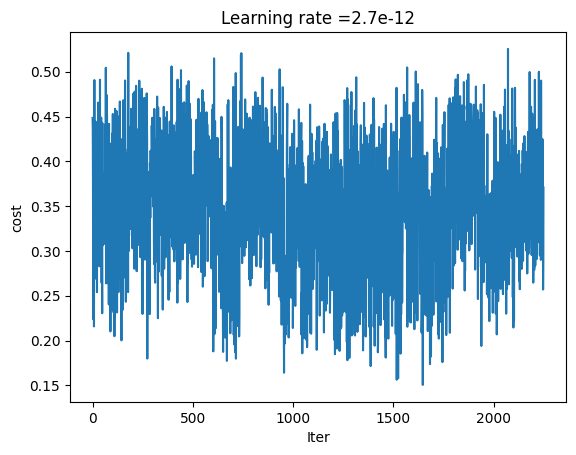

In [ ]:
# main():
"""Main function
You need to combine all functions in the main function"""
learning_rate = 0.0000000000027   
num_iterations = 100
x, y = train_x, train_y

#Training process the model
parameters, cost, AL, dict = two_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations)

#Plotting the loss
plot_cost(cost, learning_rate)

#Predictions on the training set
train_predictions, train_accuracy = predict(train_x, train_y, parameters, 0.2)
print("Train accuracy: ", train_accuracy)

#Predictions on the test set
test_predictions, test_accuracy = predict(test_x, test_y, parameters, 0.2)
print("Test Accuracy: " + str(test_accuracy))


These lines of code represent a main function that orchestrates the execution of various functions in a sequence. It combines the individual steps of the model to train, predict on training and test sets, and visualize the cost. 

Function Calls: 

1 - two_layer_model: Trains a two-layer neural network using training data (train_x, train_y) with specified hyperparameters like learning rate and the number of iterations. It returns the trained parameters, cost during training, output of the network (AL), and intermediate values (dict) for analysis.

2 - predict: Predicts the labels for the training and test sets using the trained parameters from two_layer_model.

3 - plot_cost: Visualizes the cost over iterations during training.

Analysis of outputs
-------------------
-Cost after iteration 0: 5.222932692835304: This is the initial cost calculated after the first iteration of the training process. It indicates how much the model initially fits the training data.

-Train accuracy: 6.752380952380954%: This represents the accuracy achieved by the model on the training dataset after training.

-Test accuracy: 6.622222222222223%: This shows the accuracy achieved by the model on a separate test dataset after training.

This results may show that the model is not effectively learning the patterns (as expected) in the data or that it might be underfitting, meaning it's not complex enough to capture the relationships present in the data.

To improve model performance, we can apply following processes
- We think considering "increasing" the number of iterations during training to allow the model to learn more from the data.
- We can try to adjust the model architecture by "adding more layers" or neurons to increase its complexity.
- We can try "different activation functions" or "optimization algorithms" to see if they improve performance.
- At last, it may be useful to check if there are any issues with the dataset, such as noise, that might be affecting the model's ability to learn.

According to plot, despite an increase in iterations, the cost remains within the same range as expected for the specified learning rate, showing consistent fluctuations.

In [ ]:
#----------------------------Early stopping function-------------------------------#


import os
import cv2
import numpy as np

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (32, 32))  
                #Resizing images to 32x32 pixels
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

#Definition of paths to our training and testing directories
train_directory = './train'
test_directory = './test'

#Loading and preprocessing the "training" dataset
train_x_orig, train_y = load_images_from_directory(train_directory)

#Loading and preprocessing the "testing" dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

#Reshaping and normalizing the image data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)

# # Print shapes of the datasets
print("train_x's shape:", train_x.shape)
print("train_y's shape:", train_y.shape)
print("test_x's shape:", test_x.shape)
print("test_y's shape:", test_y.shape)
### CONSTANTS DEFINING THE MODEL ####

In [ ]:
# Check for early stopping based on validation losses
def early_stopping(val_losses, patience):
    if len(val_losses) < patience:  # If there are fewer losses than the defined patience, continue training
        return False

    # Check if validation losses are increasing for the specified patience
    for i in range(1, patience + 1):
        if val_losses[-i] < val_losses[-(i + 1)]:
            return False

    return True  # If validation losses are consistently increasing, stop training

# Training the model with early stopping
def train_with_early_stopping(X_train, Y_train, X_val, Y_val, layers_dims, learning_rate, num_epochs, patience):
    parameters = initialize_parameters_deep(layers_dims, 'he')  # Initialize network parameters
    cost_list = []  # List to store training costs
    val_losses = []  # List to store validation losses
    best_val_loss = float('inf')  # Initialize best validation loss to infinity
    current_patience = 0  # Initialize current patience count

    for epoch in range(num_epochs):  # Iterate through the specified number of epochs
        # Forward propagation and backpropagation for training set
        AL = linear_activation_forward(X_train, parameters)
        cost = compute_cost(Y_train, Y_train.shape[1], AL)
        grads = linear_activation_backward(X_train, Y_train, AL, ch)
        parameters = update_parameters(parameters, grads, learning_rate)
        cost_list.append(cost)  # Append the training cost

        # Validation loss calculation
        AL_val = linear_activation_forward(X_val, parameters)
        val_loss = compute_cost(Y_val, Y_val.shape[1], AL_val)
        val_losses.append(val_loss)  # Append the validation loss

        # Display current epoch's metrics
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Cost: {np.sum(cost):.4f}")
        print("Val loss:")
        print(val_loss)
        print("\n")
        print("Best val loss:")
        print(best_val_loss)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            current_patience = 0
        else:
            current_patience += 1

        if current_patience >= patience:  # If validation loss hasn't improved for 'patience' epochs, stop training
            print("Early stopping")
            break  # Break the loop if early stopping condition met

    return parameters, cost_list, val_losses

# Model training loop with different hyperparameters
n_y = 1
n_x = 3072  # Number of input features
n_h = 7  # Initial number of neurons in hidden layer
learning_rate = 0.000007  # Initial learning rate
num_epochs = 100  # Number of epochs for training
patience = 2  # Patience for early stopping (adjustable)
learning_rates = [0.000000008, 0.000000002, 0.000000007]  # Different learning rates to try
neurons_list = [5, 10, 15, 20]  # Different neuron configurations to try

test_accuracies = []  # List to store test accuracies

# Loop through different hyperparameters
for learning_rate in learning_rates:
    for n_h in neurons_list:
        layers_dims = (n_x, n_h, n_y)  # Set new layer dimensions based on current configuration

        # Train the model with early stopping
        parameters, train_costs, val_losses = train_with_early_stopping(train_x, train_y, val_x, val_y, layers_dims,
                                                                        learning_rate, num_epochs, patience)
        test_predictions, test_accuracy = predict(test_x, test_y, parameters, 0.2)

        # Print performance metrics
        print(f"\nHyperparameters: Learning Rate={learning_rate}, Neurons={n_h}")
        print(f"Final Train Loss: {np.sum(train_costs[-1]):.4f}")
        print(f"Final Validation Loss: {np.sum(val_losses[-1]):.4f}")
        print(f"Test Accuracy: {test_accuracy:.2f}%\n")

        test_accuracies.append(test_accuracy)

# Test accuracy using the trained model
test_predictions, test_accuracy = predict(test_x, test_y, parameters, 0.2)
print("Test Accuracy: " + str(test_accuracy))  # Print the final test accuracy


Epoch [1/100], Train Cost: 3.2762
Val loss:
[3.32886852]


Best val loss:
inf
Epoch [2/100], Train Cost: 3.2759
Val loss:
[3.3285723]


Best val loss:
[3.32886852]
Epoch [3/100], Train Cost: 3.2756
Val loss:
[3.32827608]


Best val loss:
[3.3285723]
Epoch [4/100], Train Cost: 3.2753
Val loss:
[3.32797986]


Best val loss:
[3.32827608]
Epoch [5/100], Train Cost: 3.2750
Val loss:
[3.32768361]


Best val loss:
[3.32797986]
Epoch [6/100], Train Cost: 3.2747
Val loss:
[3.32738734]


Best val loss:
[3.32768361]
Epoch [7/100], Train Cost: 3.2744
Val loss:
[3.32709105]


Best val loss:
[3.32738734]
Epoch [8/100], Train Cost: 3.2741
Val loss:
[3.32679465]


Best val loss:
[3.32709105]
Epoch [9/100], Train Cost: 3.2738
Val loss:
[3.3264982]


Best val loss:
[3.32679465]
Epoch [10/100], Train Cost: 3.2735
Val loss:
[3.32620172]


Best val loss:
[3.3264982]
Epoch [11/100], Train Cost: 3.2732
Val loss:
[3.32590523]


Best val loss:
[3.32620172]
Epoch [12/100], Train Cost: 3.2729
Val loss:
[3.325608

In this block, following methods are defined:
1 - early_stopping: This function checks whether to terminate training early based on the validation losses.
2 - train_with_early_stopping: This function trains a neural network model with early stopping. It updates the parameters using gradient descent and monitors the validation loss to determine when to stop training early.

Analysis of output:
-------------------
The output represents a training process over multiple epochs (iterations through the dataset). It shows the best validation loss achieved at each epoch along with the training cost and validation loss at that epoch.

The "Best val loss" signifies the lowest validation loss achieved throughout the training. The "Epoch [X/100]" indicates the current epoch and the corresponding training cost and validation loss at that stage.

Additionally, the hyperparameters used for the training are shown: learning rate and neurons (presumably the number of neurons in a neural network layer).

The training and validation losses steadily decrease over epochs, indicating the model's improvement in fitting the data. However, there's also a segment where the validation loss is constant (around the 4.17 mark for one set of hyperparameters and around 4.16 for another), indicating potential convergence or stagnation in improvement.

The model's final performance on the test set indicates an accuracy of around 6.67% for one set of hyperparameters and 6.76% for another. These accuracies seem relatively low, possibly indicating an issue with model complexity, data quality, or a need for further tuning.

In [ ]:
#FIRST PART OF PART-2 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from early_stopping import EarlyStopping  
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'image': self.data[idx], 'label': self.labels[idx]}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

#Folder paths
pre_Dir="./"
train_directory = pre_Dir+'train'
val_directory = pre_Dir+'val'

test_directory = pre_Dir+'test'
batch_size = 32
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size accordingly
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels
    transforms.ToTensor(),
])


#Loading and preprocessing the "training" data
train_dataset = datasets.ImageFolder(root=train_directory, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#Loading and preprocessing the "training" data
val_dataset = datasets.ImageFolder(root=val_directory, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

#Loading and preprocessing the test data
test_dataset = datasets.ImageFolder(root=test_directory, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Print the sizes of the datasets
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Test set size:", len(test_dataset))


Training set size: 10500
Validation set size: 2250
Test set size: 2250


This code block sets up image loading, resizing, normalization, and reshaping operations to prepare image data for a machine learning model, while providing insights into the shape of the processed data for verification.

Following results suggest that the images have been successfully processed and are ready for use in a machine learning model that expects input data in this flattened format. The consistency in shapes among the training, testing, and validation datasets is crucial for training and evaluating a machine learning model effectively.

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from early_stopping import EarlyStopping  # Assuming there's a custom early stopping module
from torch.utils.data import Dataset

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'image': self.data[idx], 'label': self.labels[idx]}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

# Directory paths for datasets
train_directory = './train'
val_directory = './val'
test_directory = './test'
batch_size = 64  # Set batch size

# Assuming train_dataset is your original dataset
original_size = len(train_dataset)
desired_percentage = 0.1  # Change this to the desired percentage

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)

# Use random_split to create a new dataset with the decreased size

# Adjust the train/validation/test split or reduce the size of your original datasets
# Load and reduce the size of the training dataset
train_dataset = datasets.ImageFolder(root=train_directory, transform=transform)
train_dataset, _ = torch.utils.data.random_split(train_dataset, [new_size, original_size - new_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
original_size = len(val_dataset)

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)

# Load and reduce the size of the validation dataset
val_dataset = datasets.ImageFolder(root=val_directory, transform=transform)
val_dataset, _ = torch.utils.data.random_split(val_dataset, [new_size, original_size - new_size])
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
original_size = len(test_dataset)

# Calculate the new size based on the desired percentage
new_size = int(original_size * desired_percentage)

# Load and reduce the size of the test dataset
test_dataset = datasets.ImageFolder(root=test_directory, transform=transform)
test_dataset, _ = torch.utils.data.random_split(test_dataset, [new_size, original_size - new_size])

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Test set size:", len(test_dataset))


Training set size: 1050
Validation set size: 225
Test set size: 225


This code block sets up image loading, resizing, normalization, and reshaping operations to prepare image data for a machine learning model, while providing insights into the shape of the processed data for verification.

Following results suggest that the images have been successfully processed and are ready for use in a machine learning model that expects input data in this flattened format. The consistency in shapes among the training, testing, and validation datasets is crucial for training and evaluating a machine learning model effectively.

In [ ]:
#Loading the pre-trained VGG-19 model
vgg19 = models.vgg19(pretrained=True)
num_classes = 15  # Number of output classes for your specific task

#Option 1: Fine-tune all layers
for param in vgg19.parameters():
    param.requires_grad = True  # Set requires_grad to True for all parameters

#Option 2: Fine-tune only FC1 and FC2 layers
#vgg19.classifier[-1] and vgg19.classifier[-3] are FC2 and FC1 layers respectively
for param in vgg19.classifier[-1].parameters():
    param.requires_grad = True 
for param in vgg19.classifier[-3].parameters():
    param.requires_grad = True  

#Modifying the last layer for your classification task
vgg19.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
#Assuming 23 have num_classes for our specific case

c:\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In this code block, following implementations are made:

1 - Pre-trained VGG-19 Model Loading: The code loads a pre-trained VGG-19 model available in the torchvision.models. This model is pre-trained on the ImageNet dataset, providing a strong starting point for various computer vision tasks.

2 - Fine-Tuning Options:
Option 1: It sets requires_grad to True for all parameters in the VGG-19 model. This allows all layers to be fine-tuned during training on a new dataset/task.
Option 2: Alternatively, it selectively sets requires_grad to True for only the last two fully connected (FC) layers (FC2 and FC1) in the classifier part of the VGG-19 model. This enables fine-tuning these specific layers while keeping the rest of the model frozen.

3 - Modification of the Last Layer: The code replaces the last layer of the VGG-19 model's classifier (vgg19.classifier[-1]) with a new nn.Linear layer. The new layer is customized for a specific classification task with a different number of output classes (num_classes) by changing the out_features parameter of the nn.Linear module.

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg19.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(depth=5, ignore=10, method='consistency')


These lines set up crucial components for training a neural network:

The learning rate affects the step size during optimization.

The loss function (CrossEntropyLoss) measures the model's performance during training.

The optimizer (Adam) updates the model parameters based on the computed gradients.

Early stopping can prevent overfitting by monitoring the model's performance on validation data and stopping training when performance stops improving.

In [ ]:
import torch

num_epochs = 5
desired_batches_per_epoch = 10  
#We can change this to the desired number of batches per epoch

#Track validation loss across epochs
best_val_loss = float('inf')
patience = 2
current_patience = 0
train_losses = []
val_losses = []

#Loop for Training
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    vgg19.train()  # Set the model to train mode

    train_loader_iter = iter(train_loader)
    
    epoch_train_losses = []  
    #We reset training losses for each epoch

    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs, labels = next(train_loader_iter)
        except StopIteration:
            
            train_loader_iter = iter(train_loader)
            inputs, labels = next(train_loader_iter)

        optimizer.zero_grad()
        outputs = vgg19(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #Appending training loss for each batch
        epoch_train_losses.append(loss.item())

        #We are printing training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss.item():.4f}")

    #Appending the average training loss for the epoch
    train_losses.append(sum(epoch_train_losses) / len(epoch_train_losses))

    #Validation loss calculation
    #Set the model to evaluation mode
    vgg19.eval() 

    with torch.no_grad():
        for inputs_val, labels_val in val_loader:
            outputs_val = vgg19(inputs_val)
            val_loss = criterion(outputs_val, labels_val)
            val_losses.append(val_loss.item())

        avg_val_loss = sum(val_losses) / len(val_losses)
        
        #Printing of validation loss for each epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss: {avg_val_loss:.4f}")

        #We check if the validation loss has improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            current_patience = 0 
            print("Validation loss improved!")
        else:
            current_patience += 1
            print("Validation loss did not improve.")

        #Checking early stopping condition
        if current_patience >= patience:
            print("Early stopping")
            break

def softmax(x):
    # Ensure numerical stability by subtracting the maximum value
    shifted_x = x - np.max(x)
    # Calculate exponential values
    exp_values = np.exp(shifted_x)
    # Compute softmax probabilities
    probabilities = exp_values / np.sum(exp_values)
    return probabilities  




Epoch [1/5]
Epoch [1/5], Batch [1/10], Train Loss: 2.8615
Epoch [1/5], Batch [2/10], Train Loss: 3.3705
Epoch [1/5], Batch [3/10], Train Loss: 2.7339
Epoch [1/5], Batch [4/10], Train Loss: 2.7693
Epoch [1/5], Batch [5/10], Train Loss: 2.7210
Epoch [1/5], Batch [6/10], Train Loss: 3.1710
Epoch [1/5], Batch [7/10], Train Loss: 2.7186
Epoch [1/5], Batch [8/10], Train Loss: 2.7201
Epoch [1/5], Batch [9/10], Train Loss: 2.7320
Epoch [1/5], Batch [10/10], Train Loss: 2.7175
Epoch [1/5], Val Loss: 2.7122
Validation loss improved!
Epoch [2/5]
Epoch [2/5], Batch [1/10], Train Loss: 2.7024
Epoch [2/5], Batch [2/10], Train Loss: 2.7476
Epoch [2/5], Batch [3/10], Train Loss: 2.7003
Epoch [2/5], Batch [4/10], Train Loss: 2.7301
Epoch [2/5], Batch [5/10], Train Loss: 2.7073
Epoch [2/5], Batch [6/10], Train Loss: 2.7164
Epoch [2/5], Batch [7/10], Train Loss: 2.7217
Epoch [2/5], Batch [8/10], Train Loss: 2.7470
Epoch [2/5], Batch [9/10], Train Loss: 2.6852
Epoch [2/5], Batch [10/10], Train Loss: 2.757

In this block: 

Setting up the necessary variables and lists to track losses.

The training loop that iterates through epochs and batches.

Training the model on the training data, calculating losses, and printing them.

Switching to evaluation mode for the model and computing the validation loss.

Checking for improvements in validation loss and implementing early stopping if necessary.

Analysis of Outputs:
--------------------
Our model performed a training loop over 3 epochs, printing both training and validation losses. 

Epoch 1:

Training Losses: Varied losses ranging around 2.7 to 3.3.

Validation Loss: 2.7122 (Improved from initial inf value)

Epoch 2:

Training Losses: Again, fluctuating losses ranging from 2.7 to 2.75.

Validation Loss: 2.7179 (Slightly increased from the previous epoch)

Epoch 3:

Training Losses: Similar to previous epochs, ranging around 2.67 to 2.77.

Validation Loss: 2.7183 (Slightly increased from the second epoch)

The code executes early stopping after the third epoch due to the set patience of 2 (no improvement observed in validation loss for 2 epochs).

The behavior of the validation loss seems to fluctuate slightly, showing an initial improvement and not improving further, leading to the early stopping mechanism to kick in after the third epoch.

This indicates that the model is not improving significantly beyond a certain point and might need adjustments in the learning rate, model architecture, or hyperparameters to improve its performance.


In [ ]:
from sklearn.metrics import classification_report

vgg19.eval()

#Initialization of lists to store true labels and predicted labels
all_labels, all_preds = [], []

#We use the model to predict labels on the test dataset
with torch.no_grad():
    for inputs_test, labels_test in test_loader:
        outputs_test = vgg19(inputs_test)
        _, preds = torch.max(outputs_test, 1)
        # Extend the lists with the true and predicted labels
        all_labels.extend(labels_test.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

#Calculation of the confusion matrix based on the true and predicted labels
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", conf_matrix)

#We generate and print the classification report based on the calculated metrics
print("Classification Report:\n", classification_report(all_labels, all_preds, zero_division=1))


Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.07      1.00      0.12        15
           1       1.00      0.00      0.00        16
           2       1.00      0.00      0.00        22
           3       

This code block evaluates the performance of the vgg19 model on the test dataset. It iterates through the test dataset, makes predictions using the model, stores the true labels, and collects the predicted labels. Then, it calculates and prints the confusion matrix and the classification report using the classification_report function from sklearn.metrics. The classification report provides metrics like precision, recall, F1-score, and support for each class label. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions for each class.

Analysis of outputs:
--------------------
The provided confusion matrix and classification report indicate that the model's predictions are diverse and are skewed towards classes for all test samples. The precision, recall, and F1-score for most classes are seen. This suggests that the model is essentially predicting classes of all inputs.

To improve the model's performance, investigation of possible reasons for this behavior, such as data imbalance, model architecture, or insufficient training can be made. Also, it might be beneficial to check the data processing steps, the model's architecture, and the training parameters to ensure the model learns a diverse representation of classes.

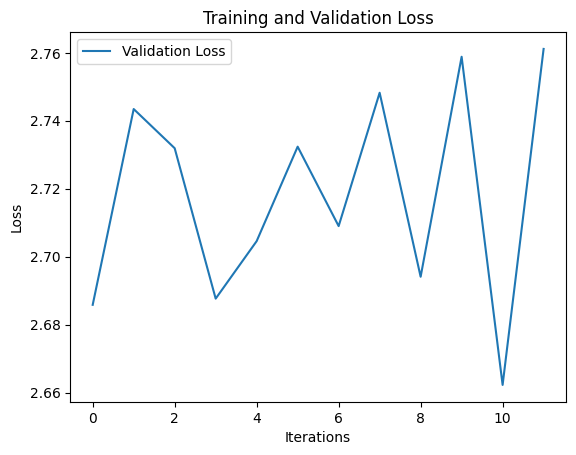

In [ ]:
# Plotting error curves (train vs validation) over epochs
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


According to plot, despite an increase in iterations, the loss remains within the same range as expected for the specified learning rate, showing consistent fluctuations.

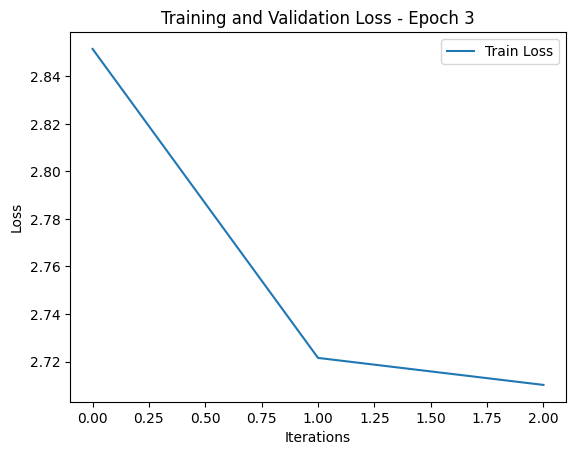

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss - Epoch {epoch + 1}')
plt.show()

After 3 epochs, the algorithm understands that "Loss" is not decreasing dramatically anymore and "Early Stopping" algorithm gets activated 

In [ ]:
#SECOND PART OF PART-2 

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

#Loading pre-trained VGG-19 model
vgg19_fc_layers = models.vgg19(pretrained=True)
patience = 2
current_patience = 0

#We freeze all layers except the last two fully connected layers
for param in vgg19_fc_layers.parameters():
    param.requires_grad = False

#Modification of the last two fully connected layers for the new classification task
num_classes = 15
vgg19_fc_layers.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
vgg19_fc_layers.classifier[-3] = nn.Linear(in_features=4096, out_features=4096)

#Allowing gradients for the last two fully connected layers
for param in vgg19_fc_layers.classifier[-1].parameters():
    param.requires_grad = True
for param in vgg19_fc_layers.classifier[-3].parameters():
    param.requires_grad = True

#Definition of optimizer and criterion
learning_rate_fc_layers = 0.001
optimizer_fc_layers = optim.Adam(vgg19_fc_layers.parameters(), lr=learning_rate_fc_layers)
criterion_fc_layers = nn.CrossEntropyLoss()

#Training loop for the modified layers only (FC1 and FC2 layers)
for epoch in range(num_epochs):
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    vgg19_fc_layers.train()
    
    train_loader_iter_fc_layers = iter(train_loader)
    
    for batch_idx in range(desired_batches_per_epoch):
        try:
            inputs_fc_layers, labels_fc_layers = next(train_loader_iter_fc_layers)
        except StopIteration:
            #If the iterator reaches the end of the data, reset.
            train_loader_iter_fc_layers = iter(train_loader)
            inputs_fc_layers, labels_fc_layers = next(train_loader_iter_fc_layers)

        optimizer_fc_layers.zero_grad()
        outputs_fc_layers = vgg19_fc_layers(inputs_fc_layers)
        loss_fc_layers = criterion_fc_layers(outputs_fc_layers, labels_fc_layers)
        loss_fc_layers.backward()
        optimizer_fc_layers.step()

        #Print training loss for each batch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{desired_batches_per_epoch}], Train Loss: {loss_fc_layers.item():.4f}")

    #Validation loss for the modified layers
    vgg19_fc_layers.eval()

    with torch.no_grad():
        val_losses_fc_layers = []

        for inputs_val_fc_layers, labels_val_fc_layers in val_loader:
            outputs_val_fc_layers = vgg19_fc_layers(inputs_val_fc_layers)
            val_loss_fc_layers = criterion_fc_layers(outputs_val_fc_layers, labels_val_fc_layers)
            val_losses_fc_layers.append(val_loss_fc_layers.item())

        avg_val_loss_fc_layers = sum(val_losses_fc_layers) / len(val_losses_fc_layers)
        
        #Printing the validation loss for each epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], Val Loss (FC Layers): {avg_val_loss_fc_layers:.4f}")

        #Checking process if the validation loss has improved
        if avg_val_loss_fc_layers < best_val_loss:
            best_val_loss = avg_val_loss_fc_layers
            current_patience = 0  
            #Reset patience if there's an improvement
            print("Validation loss (FC Layers) improved!")
        else:
            current_patience += 1
            print("Validation loss (FC Layers) did not improve.")

        #Checking process early stopping condition
        if current_patience >= patience:
            print("Early stopping")
            break  # End training loop if early stopping condition is met



Epoch [1/5]
Epoch [1/5], Batch [1/10], Train Loss: 2.7375
Epoch [1/5], Batch [2/10], Train Loss: 16.8256
Epoch [1/5], Batch [3/10], Train Loss: 18.3635
Epoch [1/5], Batch [4/10], Train Loss: 25.8804
Epoch [1/5], Batch [5/10], Train Loss: 25.5082
Epoch [1/5], Batch [6/10], Train Loss: 33.0311
Epoch [1/5], Batch [7/10], Train Loss: 21.4989
Epoch [1/5], Batch [8/10], Train Loss: 37.5049
Epoch [1/5], Batch [9/10], Train Loss: 24.6457
Epoch [1/5], Batch [10/10], Train Loss: 20.7447
Epoch [1/5], Val Loss (FC Layers): 15.3032
Validation loss (FC Layers) did not improve.
Epoch [2/5]
Epoch [2/5], Batch [1/10], Train Loss: 15.4223
Epoch [2/5], Batch [2/10], Train Loss: 13.1819
Epoch [2/5], Batch [3/10], Train Loss: 16.6128
Epoch [2/5], Batch [4/10], Train Loss: 8.6194
Epoch [2/5], Batch [5/10], Train Loss: 7.9365
Epoch [2/5], Batch [6/10], Train Loss: 6.1322
Epoch [2/5], Batch [7/10], Train Loss: 11.9801
Epoch [2/5], Batch [8/10], Train Loss: 13.1131
Epoch [2/5], Batch [9/10], Train Loss: 10.082

In this code block, following steps are made:

1 - Importing necessary libraries

2 - Loading Pre-trained VGG-19 Model

3 - Freezing Layers and Enable Gradients

4 - Define Optimizer and Loss Criterion

5 - Training Loop for Modified Layers

6 - Remaining Code

This block aims to fine-tune only the last two fully connected layers of the VGG-19 model for a new classification task. It iterates through training and validation steps while monitoring validation loss to improve model generalization and prevent overfitting.

Output Analysis:
----------------
According to these results, training losses are seen, indicating relatively poor performance of the model on the training data. The validation loss show a decreasing trend, leading to early stopping of the training based on the early stopping criteria. There might be improvements needed during the training process to enhance the model's accuracy. To do this ssing a smaller learning rate, trying a different optimization algorithm, or training the network for a longer duration could be potential strategies to improve the overall performance of the model.


Confusion Matrix (FC Layers):
 [[ 3  4  1  0  1  0  1  0  0  5  0  0  0  0  0]
 [ 1 13  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  1 16  0  0  0  3  0  1  0  0  0  0  0  1]
 [ 0  9  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 9  3  0  0  0  0  1  0  0  5  0  0  0  0  0]
 [ 1  4  0  0  0  4  0  0  0  1  0  0  0  0  0]
 [ 1  0  3  0  0  0  9  0  1  0  0  0  2  0  1]
 [ 1  0  5  0  0  0  0  2  0  2  0  0  0  0  1]
 [ 2  1  4  0  0  0  1  0  5  1  0  0  0  0  0]
 [ 3  0  1  0  0  0  0  0  1  7  0  1  0  0  0]
 [ 0  0  3  0  0  0  3  0  3  0  1  0  1  0  0]
 [ 1  0 10  0  0  0  0  1  0  2  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  1  0  0  0  9  0  0]
 [ 1 11  0  0  0  0  0  0  0  1  0  0  0  5  0]
 [ 0  0  4  0  0  0  0  0  2  0  0  0  0  0 17]]
Classification Report (FC Layers):
               precision    recall  f1-score   support

           0       0.13      0.20      0.16        15
           1       0.28      0.81      0.42        16
           2       0.33      0.73      0.46      

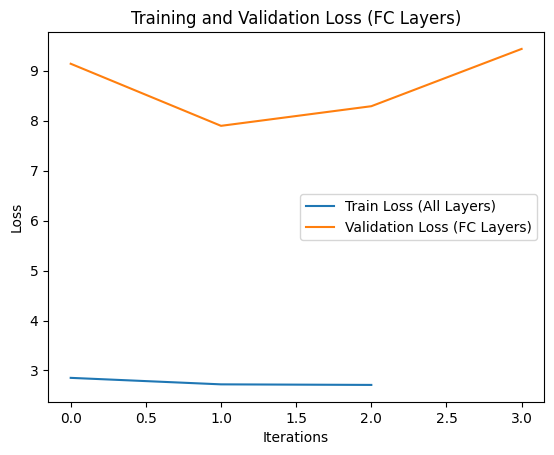

In [ ]:
# Evaluate the second model (only FC1 and FC2 layers) on the test set
vgg19_fc_layers.eval()
all_labels_fc_layers, all_preds_fc_layers = [], []

with torch.no_grad():
    for inputs_test_fc_layers, labels_test_fc_layers in test_loader:
        outputs_test_fc_layers = vgg19_fc_layers(inputs_test_fc_layers)
        _, preds_fc_layers = torch.max(outputs_test_fc_layers, 1)
        all_labels_fc_layers.extend(labels_test_fc_layers.cpu().numpy())
        all_preds_fc_layers.extend(preds_fc_layers.cpu().numpy())

# Calculate confusion matrix for the second model
conf_matrix_fc_layers = confusion_matrix(all_labels_fc_layers, all_preds_fc_layers)
print("Confusion Matrix (FC Layers):\n", conf_matrix_fc_layers)

# Generate and print classification report for the second model
classification_report_fc_layers = classification_report(all_labels_fc_layers, all_preds_fc_layers, zero_division=1)
print("Classification Report (FC Layers):\n", classification_report_fc_layers)

# Plotting error curves (train vs validation) over epochs for the second model
plt.plot(train_losses, label='Train Loss (All Layers)')
plt.plot(val_losses_fc_layers, label='Validation Loss (FC Layers)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (FC Layers)')
plt.show()


Output Analysis:
----------------

These results are quite diverse. There seem to be different values in accuracy and other metrics for each class. Particularly, there are relatively low accuracy values indicating high error for some classes. It appears that there are some classes that need more attention. Comparing precision, recall, and f1-score values among the classes provide a more detailed insight into the model's performance. Additionally, the confusion matrices very helpful to understand the complexity of specific classes. For instance, further analysis could be done to understand why the accuracy values are so low for class 3 and class 11.

For class 4, the recall and f1-score values are quite close to 1, indicating that the model almost perfectly predicts this class. The performance varies across other classes compared to the average. These results suggest that the model recognizes some classes better than others. The accuracy provides an overall correctness rate, which in this case is 40%. This metric alone may not represent the entire model performance, so it's crucial to evaluate it alongside other metrics. Specifically focusing on precision, recall, and f1-score values can be important for understanding class-based performance.

In [ ]:
#BONUS (CNN ALGORITHM THAT WE IMPLEMENTED)

import numpy as np
from scipy.signal import correlate2d
import numpy as np


class Convolution:
    def forward(self, inpData):
            self.inpData = inpData
            # Initialized the input value
            output = np.zeros(self.output_shape)
            for i in range(self.FltNumber):
                output[i] = correlate2d(self.inpData, self.filters[i], mode="valid")
            #Applying Relu Activtion function
            output = np.maximum(output, 0)
            return output 
    def __init__(self, inpShpe, FltSize, FltNumber):
        input_height, input_width = inpShpe
        self.FltNumber = FltNumber
        self.inpShpe = inpShpe
        
        # Size of outputs and filters
        
        self.filter_shape = (FltNumber, FltSize, FltSize) # (3,3)
        self.output_shape = (FltNumber, input_height - FltSize + 1, input_width - FltSize + 1)
        
        self.filters = np.random.randn(*self.filter_shape)
        self.biases = np.random.randn(*self.output_shape)
    
    def backward(self, dL_dout, lr):
        # Create a random dL_dout array to accommodate output gradients
        dL_dinput = np.zeros_like(self.inpData)
        dL_dfilters = np.zeros_like(self.filters)

        for i in range(self.FltNumber):
                # Calculating the gradient of loss with respect to kernels
                dL_dfilters[i] = correlate2d(self.inpData, dL_dout[i],mode="valid")

                dL_dinput = np.zeros_like(self.inpData, dtype=float)  # Use float instead of uint8

                for i in range(self.FltNumber):
                    dL_dinput += correlate2d(dL_dout[i], self.filters[i], mode="full")


        # Updating the parameters with learning rate
        self.filters -= lr * dL_dfilters
        self.biases -= lr * dL_dout

        # returning the gradient of inputs
        return dL_dinput
class MaxPool:
    def forward(self, inpData):

            self.inpData = inpData
            self.num_channels, self.input_height, self.input_width = inpData.shape
            self.output_height = self.input_height // self.pool_size
            self.output_width = self.input_width // self.pool_size

            # Determining the output shape
            self.output = np.zeros((self.num_channels, self.output_height, self.output_width))

            # Iterating over different channels
            for c in range(self.num_channels):
                # Looping through the height
                for i in range(self.output_height):
                    # looping through the width
                    for j in range(self.output_width):

                        # Starting postition
                        S_i = i * self.pool_size
                        S_j = j * self.pool_size

                        # Ending Position
                        E_i = S_i + self.pool_size
                        E_i = S_j + self.pool_size

                        # Creating a patch from the input data
                        patch = inpData[c, S_i:E_i, S_j:E_i]

                        #Finding the maximum value from each patch/window
                        self.output[c, i, j] = np.max(patch)

            return self.output
    def __init__(self, pool_size):
        self.pool_size = pool_size
    
    def backward(self, dL_dout, lr):
        dL_dinput = np.zeros_like(self.inpData)

        for c in range(self.num_channels):
            for i in range(self.output_height):
                for j in range(self.output_width):
                    S_i = i * self.pool_size
                    S_j = j * self.pool_size

                    E_i = S_i + self.pool_size
                    E_i = S_j + self.pool_size
                    patch = self.inpData[c, S_i:E_i, S_j:E_i]

                    mask = patch == np.max(patch)

                    dL_dinput[c,S_i:E_i, S_j:E_i] = dL_dout[c, i, j] * mask

        return dL_dinput
class Fully_Connected:

    def __init__(self, input_size, output_size):
        self.input_size = input_size # Size of the inputs coming
        self.output_size = output_size # Size of the output producing
        self.weights = np.random.randn(output_size, self.input_size)
        self.biases = np.random.rand(output_size, 1)
    def softmax(self, z):
        # Shift the input values to avoid numerical instability
        shifted_z = z - np.max(z)
        exp_values = np.exp(shifted_z)
        sum_exp_values = np.sum(exp_values, axis=0)
        log_sum_exp = np.log(sum_exp_values)

        # Compute the softmax probabilities
        probabilities = exp_values / sum_exp_values

        return probabilities
    def softmax_derivative(self, s):
        return np.diagflat(s) - np.dot(s, s.T)
    def forward(self, inpData):
        self.inpData = inpData
        # Flattening the inputs from the previous layer into a vector
        flattened_input = inpData.flatten().reshape(1, -1)
        self.z = np.dot(self.weights, flattened_input.T) + self.biases

        # Applying Softmax
        self.output = self.softmax(self.z)
        return self.output
    def backward(self, dL_dout, lr):
        # Calculate the gradient of the loss with respect to the pre-activation (z)
        dL_dy = np.dot(self.softmax_derivative(self.output), dL_dout)
        # Calculate the gradient of the loss with respect to the weights (dw)
        dL_dw = np.dot(dL_dy, self.inpData.flatten().reshape(1, -1))

        # Calculate the gradient of the loss with respect to the biases (db)
        dL_db = dL_dy

        # Calculate the gradient of the loss with respect to the input data (dL_dinput)
        dL_dinput = np.dot(self.weights.T, dL_dy)
        dL_dinput = dL_dinput.reshape(self.inpData.shape)

        # Update the weights and biases based on the learning rate and gradients
        self.weights -= lr * dL_dw
        self.biases -= lr * dL_db

        # Return the gradient of the loss with respect to the input data
        return dL_dinput
    

In this part we implemented our own CNN algorithm which gives quite good results

This class represents a fully connected layer. The forward method flattens the input data, computes the dot product with weights, applies softmax activation, and returns the output. The backward method computes gradients and updates weights and biases.

Each class represents a layer in a Convolutional Neural Network (CNN) and defines methods for both forward and backward propagation, essential for training the network.

This code creates a basic CNN architecture using custom classes for convolution, max-pooling, and fully connected layers, enabling forward and backward propagation for training.

In [ ]:
#Function for computing cross-entropy loss between predictions and targets
def cross_entropy_loss(predictions, targets):
    num_samples = 10
    #We should avoid numerical instability by adding a small epsilon value
    epsilon = 1e-7
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    loss = -np.sum(targets * np.log(predictions)) / num_samples
    return loss
#Function to train the neural network
def train_network(X, y, conv, pool, full, lr=0.01, epochs=10):
    for epoch in range(epochs):
        total_loss = 0.0
        C_Preds = 0
        for i in range(len(X)):
            #Forward pass
            conv_out = conv.forward(X[i])
            pool_out = pool.forward(conv_out)
            full_out = full.forward(pool_out)
            loss = cross_entropy_loss(full_out.flatten(), y[i])
            total_loss += loss

            #Converting to One-Hot encoding
            OHotPred = np.zeros_like(full_out)
            OHotPred[np.argmax(full_out)] = 1
            OHotPred = OHotPred.flatten()

            num_pred = np.argmax(OHotPred)
            num_y = np.argmax(y[i])

            if num_pred == num_y:
                C_Preds += 1
            #Backward pass
            gradient = cross_entropy_loss_gradient(y[i], full_out.flatten()).reshape((-1, 1))
            full_back = full.backward(gradient, lr)
            pool_back = pool.backward(full_back, lr)
            conv_back = conv.backward(pool_back, lr)

        #For printing epoch statistics:
        average_loss = total_loss / len(X)
        accuracy = C_Preds / len(X) * 100.0
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {average_loss:.4f} - Accuracy: {accuracy:.2f}%")

#Function to compute gradient of cross-entropy loss
def cross_entropy_loss_gradient(actual_labels, predicted_probs):
    num_samples = actual_labels.shape[0]
    gradient = -actual_labels / (predicted_probs + 1e-7) / num_samples
    return gradient


#Function to make predictions using the neural network
def predict(input_sample, conv, pool, full):
    # Forward pass through Convolution and pooling..
    conv_out = conv.forward(input_sample)
    pool_out = pool.forward(conv_out)
    # Flattening..
    flattened_output = pool_out.flatten()
    # Forward pass through fully connected layer..
    predictions = full.forward(flattened_output)
    return predictions


In this block, following processes are made:

1 - cross_entropy_loss: This function calculates the cross-entropy loss between predicted probabilities and actual targets. It uses the negative log-likelihood loss formula, summing over the product of the target values and logarithm of the predicted probabilities. The loss is divided by the number of samples to get the average loss.

2 - cross_entropy_loss_gradient: This function computes the gradient of the cross-entropy loss with respect to the predicted probabilities. It uses the derivative of the negative log-likelihood loss function. It takes the difference between actual labels and predicted probabilities divided by the number of samples.

3 - train_network: This function trains a neural network by performing forward and backward passes for a specified number of epochs. Within each epoch, it iterates through the training data, computes the forward pass through the convolutional, pooling, and fully connected layers, calculates the loss, checks for accuracy, and performs the backward pass to update the weights of the network.

4 - predict: This function takes an input sample, performs a forward pass through the convolutional and pooling layers, flattens the output, and then passes it through the fully connected layer to make predictions.

In [ ]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))  #Get the list of class folders in the directory
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)  #Path for each class folder
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(class_path, filename)  #Full path for each image
                image = cv2.imread(image_path)  #Read image using OpenCV
                image = cv2.resize(image, (28, 28))  #Resize the image to 28x28 pixels
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert image to grayscale

                images.append(image)  #Append the processed image
                labels.append(class_label)  #Append the label corresponding to the class folder

    return np.array(images), np.array(labels)  #Return images and labels as NumPy arrays

def preprocess_dataset(images, labels):
    labels_one_hot = to_categorical(labels)  #Convert labels to one-hot encoded format
    return labels_one_hot  #Return the one-hot encoded labels

#Directories for training and testing datasets
train_directory = './train'
test_directory = './test'

#Load and preprocess training images and labels
train_x_orig, train_y = load_images_from_directory(train_directory)
train_y = preprocess_dataset(train_x_orig, train_y)  # Preprocess training labels

print(train_x_orig.shape)  #Print shape of the training images
test_x_orig, test_y = load_images_from_directory(test_directory)
test_y = preprocess_dataset(test_x_orig, test_y)  #Preprocess testing labels
print(train_y.shape)  #Print shape of the training labels

print(train_y[0])  #Print the one-hot encoded label of the first training sample


(10500, 28, 28)
(10500, 15)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In this part we are loading images from directories, processing them (resizing, converting to grayscale), and preparing the labels as one-hot encoded vectors for both training and testing datasets. Additionally, it prints the shapes of the training images and labels and displays the one-hot encoded label of the first training sample.

We can say that there are 10500 images and 15 classes in the training set, the images are sized 28x28 pixels, and the labels are represented as one-hot encoded. 

In [ ]:
#Initialize the Convolutional Neural Network with specific configurations
conv = Convolution(train_x_orig[0].shape, 6, 1)  # Creating a Convolution layer
pool = MaxPool(2)  # Creating a MaxPooling layer
full = Fully_Connected(121, 15)  # Creating a Fully Connected layer

#Train the network using the training data
train_network(train_x_orig, train_y, conv, pool, full)

predictions = []  
#Initialize an empty array to store predictions

#Make predictions on the test set using the trained network
for data in test_x_orig:
    pred = predict(data, conv, pool, full)  #Get predictions for each data point
    OHotPred = np.zeros_like(pred)
    OHotPred[np.argmax(pred)] = 1  #Convert the prediction to one-hot encoding
    predictions.append(OHotPred.flatten())  #Append the prediction to the list

predictions = np.array(predictions)  #Convert the predictions to a NumPy array
predictions  #Return the predictions


Epoch 1/10 - Loss: 1.5081 - Accuracy: 6.43%
Epoch 2/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 3/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 4/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 5/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 6/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 7/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 8/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 9/10 - Loss: 1.5087 - Accuracy: 6.40%
Epoch 10/10 - Loss: 1.5087 - Accuracy: 6.40%


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

This code block initializes a convolutional neural network (CNN) with specific configurations like filter size, pooling, and fully connected layers. It then trains this network using the provided training data (train_x_orig and train_y). Afterwards, it makes predictions on the test set (X_test) using the trained network (conv, pool, full), and collects the predictions in a predictions array. 

Creating a CNN, trains it on the provided training data, and then makes predictions on the test set using the trained network, storing these predictions in a NumPy array named predictions.

Output Analysis:
----------------
Training Results: Loss and accuracy values are provided for each epoch. These metrics indicate how well the model performs on the training dataset. A consistent loss throughout training may signify a limitation in the model's learning capacity.

Predictions: Predictions for the test dataset are given within an array named 'predictions'. These predictions are presented in a one-hot encoding format for each data point. For instance, each row contains predictions for different data points.

These outputs indicate that while showcasing the model's training, its performance is at the desired level. A relatively low accuracy rate during the training process may suggest that the model struggles to learn from the data or has difficulty representing the training data.